图片处理之滤波
===

# 10.Laplacian滤波器

Laplacian滤波器是对图像亮度进行二次微分从而检测边缘的滤波器。由于数字图像是离散的，x方向和y方向的一次微分分别按照以下式子计算

$I_x(x,y)=\frac{I(x+1,y)-I(x,y)}{(x+1)-x}=I(x+1,y)-I(x,y)I_y(x,y)=\frac{I(x,y+1)-I(x,y)}{(y+1)-y}=I(x,y+1)-I(x,y)$

因此二次微分按照以下式子计算

$I_{xx}(x,y)=\frac{I_x(x,y)-I_x(x-1,y)}{(x+1)-x}=I_x(x,y)-I_x(x-1,y)=[I(x+1,y)-I(x,y)]-[I(x,y)-I(x-1,y)]=I(x+1,y) - 2\cdot I(x,y) + I(x-1,y)$

同理$I_{yy}(x,y)=I(x,y+1)-2\cdot I(x,y)+I(x,y-1)$,特此，Laplacian表达式如下：

\begin{align*}
&\nabla^2\ I(x,y)\
=&I_{xx}(x,y)+I_{yy}(x,y)\
=&I(x-1,y) + I(x,y-1) - 4 * I(x,y) + I(x+1,y) + I(x,y+1)
\end{align*}

那么卷积核就是$K=\begin{bmatrix}
0&1&0 \\
1&-4&1 \\
0&1&0
\end{bmatrix}$

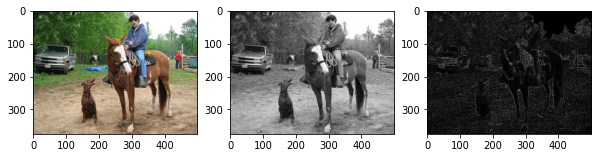

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

k = [[0., 1., 0.], [1., -4., 1.], [0., 1., 0.]]

for y in range(H):
    for x in range(W):
        out[pad + y, pad + x] = np.sum(k * (tmp[y : y+k_size, x : x+k_size]))

out = np.clip(out, 0, 255)

out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

# 11.Emboss滤波器

Emboss滤波器可以使物体轮廓更加清晰，卷积核是$K=\begin{bmatrix}
-2&-1&0 \\
-1&1&1 \\
0&1&2
\end{bmatrix}$

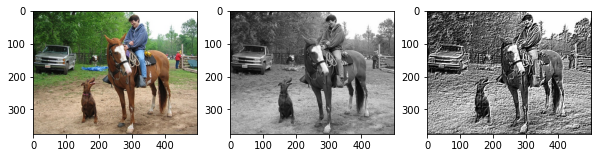

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

k = [[-2., -1., 0.], [-1., 1., 1.], [0., 1., 2.]]

for y in range(H):
    for x in range(W):
        out[pad + y, pad + x] = np.sum(k * (tmp[y : y+k_size, x : x+k_size]))

out = np.clip(out, 0, 255)

out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

# 12.LoG滤波器

LoG(Laplacian of Gaussian)即高斯-拉普拉斯的缩写，使用高斯滤波器使图像平滑之后再使用拉普拉斯滤波器使图像轮廓更加清晰

为了防止拉普拉斯滤波器计算二次微分会使得图像噪声更加明显，所以我们首先使用高斯滤波器来抑制噪声，式子如下

$\begin{align*}
\text{LoG}(x,y)=\frac{x^2 + y^2 - s^2}{2 \cdot \pi \cdot s^6} \cdot e^{-\frac{x^2+y^2}{2\cdot s^2}}
\end{align*}$

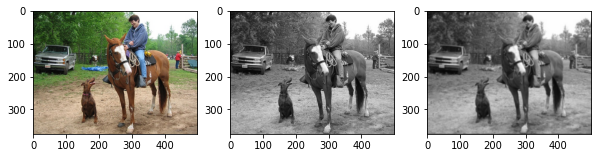

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("data/02.jpg")

b = image[:, :, 0].copy()
g = image[:, :, 1].copy()
r = image[:, :, 2].copy()
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

#region filter
H,W = gray.shape
k_size = 5
sigma = 3
pad = k_size//2
out = np.zeros((H + pad * 2, W + pad * 2), dtype=np.float)
out[pad : pad + H, pad : pad + W] = gray.copy().astype(np.float)
tmp = out.copy()

k = np.zeros((k_size, k_size), dtype=np.float)
for x in range(-pad, -pad + k_size):
    for y in range(-pad, -pad + k_size):
        k[y + pad, x + pad] = (x ** 2 + y ** 2 - sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * (sigma ** 2)))

k /= (2 * np.pi * (sigma ** 6))
k /= k.sum()

for y in range(H):
    for x in range(W):
        out[pad + y, pad + x] = np.sum(k * (tmp[y : y+k_size, x : x+k_size]))

out = np.clip(out, 0, 255)

out = out[pad: pad + H, pad: pad + W].astype(np.uint8)
#endregion filter

plt.figure(figsize=(10,8), facecolor='white')
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))